In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
seed = 42
np.random.seed(seed=seed)
%matplotlib inline

In [3]:
# Generate parameters
def gen_param(num):
    path = list(range(num))
    X = np.random.random(num)
    Y = np.random.random(num)
    XY = X + Y * 1j
    return num, path, X, Y, XY

In [4]:
# Plot path, edges, subtours
def plot_path(path, edges=False, size=6):
    plt.figure(figsize=(size, size))
    cmap = plt.get_cmap("tab10")
    plt.axis([0,1,0,1], 'equal')
    plt.plot(X[path], Y[path], alpha=0.0)
    plt.scatter(X[0], Y[0], s=80, c='r', marker='o')
    if path:
        for i in range(len(path)-1):
            plt.arrow(X[path[i]], Y[path[i]], 
                      X[path[i+1]]-X[path[i]], Y[path[i+1]]-Y[path[i]], 
                      head_width=0.02, head_length=0.02, length_includes_head=True, 
                      fc=cmap(0), ec=cmap(0))
    if edges:
        for e in edges:
            plt.plot([X[e[0]], X[e[1]]], [Y[e[0]], Y[e[1]]])
    
    for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')

Initial Plot: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


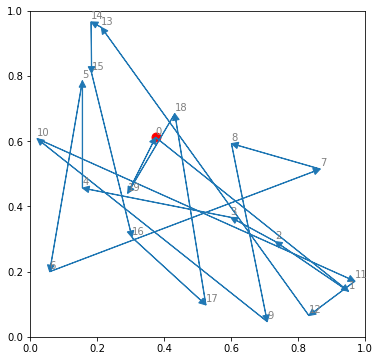

In [5]:
# Generate parameters and Plot initial path
num, path, X, Y, XY = gen_param(20) # the number of nodes
plot_path(path + [0])
print('Initial Plot:', path)

[[19, 0], [11, 1], [9, 2], [2, 3], [10, 4], [19, 4], [10, 5], [2, 7], [3, 8], [18, 8], [12, 9], [1, 12], [14, 13], [15, 13], [5, 15], [6, 16], [9, 17], [0, 18], [16, 19]]


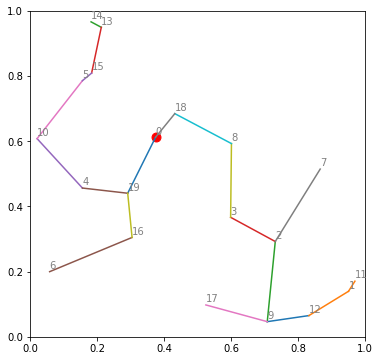

In [35]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree as MSP

matrix = [[abs(XY[i] - XY[j]) for j in range(num)] for i in range(num)]
        
MX = csr_matrix(matrix)
Tcsr = MSP(MX)
Tcsr = Tcsr.toarray()*1000
#Tcsr = Tcsr.astype(np.int32)
edges = [[i, j] for j in range(num) for i in range(num) if Tcsr[i][j] > 0]

plot_path(False, edges)
print(edges)

In [41]:
m = LpProblem(sense=LpMaximize)
R = [LpVariable('var'+str(p), lowBound=0) for p in path]
m += lpSum(R*2)
for i in range(len(R)): 
    for j in range(i+1, len(R)):
        m += R[i] + R[j] <= abs(XY[path[i]]-XY[path[j]])
m.solve()
#print([value(r) for r in R] , value(m.objective))

1

In [45]:
Edges = []
for i in range(len(R)):
    for j in range(i+1, len(R)):
        diff = value(R[i]) + value(R[j]) - abs(XY[i] - XY[j])
        if abs(diff) < 1e-06:
            Edges.append([i, j])
print(Edges)

[[0, 8], [0, 18], [1, 11], [2, 3], [2, 17], [4, 10], [4, 19], [5, 15], [6, 16], [6, 19], [7, 8], [8, 18], [9, 12], [9, 17], [12, 17], [13, 14], [16, 19]]


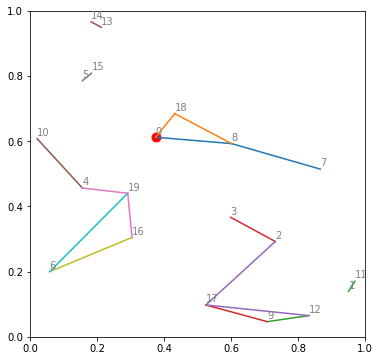

In [46]:
plot_path(False, Edges, 6)

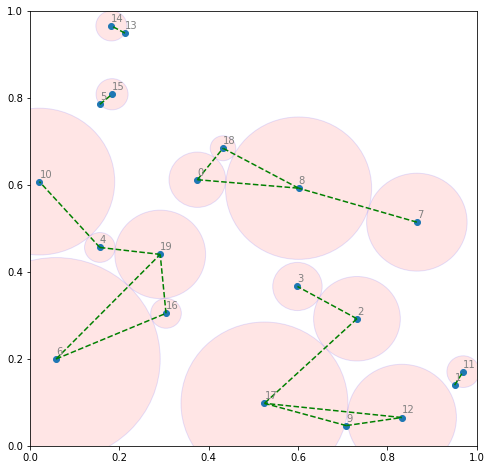

In [47]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
plt.axis([0,1,0,1], 'equal')

cir = set(sum(Edges, []))
for i in cir:
    C = plt.Circle((X[i],Y[i]), value(R[i]), fc='r', ec='b', fill=1, alpha=0.1, zorder=0)
    ax.add_patch(C)
ax.scatter(X[path], Y[path], zorder=1)
for i in range(num):
        plt.text(X[i], Y[i]+0.01, s=i, fontsize=10, color='gray')
for i, j in Edges:
    plt.plot(X[[i, j]], Y[[i, j]], 'g--')

In [ ]:
for n in range(num):
    for [i, j] in Edges:
        if n == i or n == j:
            
    